# Code along: 2-sample t-test

We use a 2-sample t-test when comparing 2 samples and we're dealing with numerical data (time duration, money spent, weight...).

## 1. Introduction & data

Watch this Khan Academy video to get the context of the example we will use in this notebook. Watch how the calculations to find the p-value are made by hand:
https://www.youtube.com/watch?v=NkGvw18zlGQ

In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd

**Experiment definition**: 

1. We want to test the effect of using two different fertilizers on tomato plants. 
2. We will apply these two fertilizers to the plants in two fields, A and B, and wait for the plants to grow.
3. Then, we will take two random samples of plants from both fields and we will measure them.
4. Our goal is to determine if the plants exposed to one of the two fertilizers have grown higher, on average. 

Let's define the experiment formally with the Null and the Alternative Hypothesis. We can phrase them in several ways:

* **Null Hypothesis**: 
  * mean height of plants in field A = mean height of plants in field B
  * the difference between the mean height of the plants in fields A and B (expressed as d) is zero, so **d = 0**
* **Alternative Hypothesis**: 
  * mean height of plants in field A != mean height of plants in field B
  * the difference between the mean height of the plants in fields A and B is not zero, so **d != 0**

Below's our collected data:



> *Note: we've generated 2 samples with the same means and standard deviations of fields A and B from Khan Academy's video, so you can follow the video and the code along in parallel.*



In [ ]:
f_a = np.array([1.53021758, 0.70571215, 2.01610148, 1.14367405, 0.93970563,
       1.74358147, 1.72979421, 0.99173825, 1.30784819, 0.18865752,
       1.92501786, 1.79597301, 1.77666206, 0.54937259, 1.13296132,
       1.40105918, 1.60272671, 1.44154697, 1.9605791 , 0.52757822,
       1.19867684, 0.99201533])

print("mean plant height in field A:", np.mean(f_a))
print("standard deviation of plants in field A:", np.std(f_a))

mean plant height in field A: 1.300054532727273
standard deviation of plants in field A: 0.500003892354737


In [ ]:
f_b = np.array([1.65802641, 1.76603167, 1.89544547, 1.45920841, 1.80266623,
       0.80989183, 1.54506744, 1.85769076, 1.48064793, 1.7310313 ,
       1.91207357, 1.71378148, 1.70911519, 1.56339253, 1.63741389,
       1.50316156, 1.85250241, 2.15778815, 1.62285988, 1.43006622,
       1.61084258, 0.97720672, 1.67433766, 1.03085296])

print("mean plant height in field A:", np.mean(f_b))
print("standard deviation of plants in field B:", np.std(f_b))

mean plant height in field A: 1.6000459270833332
standard deviation of plants in field B: 0.30002173916596514


The difference between the observed sample means is `0.3`:

In [ ]:
round(np.mean(f_b) - np.mean(f_a), 2)

0.3

## 2. Permutation Test

In a permutation procedure, two or more samples are involved, typically the groups in an A/B or other hypothesis test. *Permute* means to change the order of a set of values. The first step in a permutation test of a hypothesis is to combine the results from groups A and B (and, if used, C, D,…). This is the logical embodiment of the null hypothesis that the treatments to which the groups were exposed do not differ. We then test that hypothesis by randomly drawing groups from this combined set and seeing how much they differ from one another. The permutation procedure is as follows:

1. Combine the results from the different groups into a single data set.
2. Shuffle the combined data and then randomly draw (without replacement) a resample of the same size as group A (clearly it will contain some data from the other groups).
3. From the remaining data, randomly draw (without replacement) a resample of the same size as group B.
4. Do the same for groups C, D, and so on. You have now collected one set of resamples that mirror the sizes of the original samples.
5. Whatever statistic or estimate was calculated for the original samples (e.g., difference in means or group proportions), calculate it now for the resamples, and record; this
constitutes one permutation iteration.
6. Repeat the previous steps R times to yield a permutation distribution of the test statistic.

### 2.1. Concatenate together the two samples into a single "box", where we have all the observations together

We are combining and mixing together all the plants in a single data set —we will pretend they belong to the same field, the same population.

Note that this is what the Null Hypothesis implies: that all plants belong to the same population (or belong to populations with equal means).

In [ ]:
import pandas as pd
a_b_together = pd.Series(np.concatenate([f_a, f_b]))

### 2.2. We take 2 new random resamples of the same size of A and B, from the "box" we created

Here, we are observing what effect can "chance" have in taking 2 random resamples from the very same population.

Note that we make sure that the sizes of the new resamples are of the same size of the original ones, in this case `22` and `24`.

In [ ]:
# new sample A, random without replacement
# the sample size is len(f_a) = 22
s_a = a_b_together.sample(len(f_a))

In [ ]:
# new sample B, defined as all observations from a_b together
# not present in sample A
s_b = a_b_together[~a_b_together.index.isin(s_a.index)]

In [ ]:
# code explanation:
# the expression used inside [] is boolean indexing.
# the symbol ~ inverts the boolean values (from True to False and viceversa)
~a_b_together.index.isin(s_a.index)

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
        True])

### 2.3. We look at the difference between the two new random samples

In [ ]:
s_a.mean()

1.4962955368181818

In [ ]:
s_b.mean()

1.4201583400000002

In [ ]:
s_a.mean() - s_b.mean()

0.07613719681818165

- There is indeed a difference between these two new "artificial" fields we have created. 

- This difference is created by chance: both fields were sampled from the same population and randomness is the only responsible for the difference. 

- What we have done is a single iteration of a permutation test. If you run the code above again a few times you will be able to observe how big or small are differences created by chance.

- We will now run many iterations using a `for` loop, and count how often does it happen that we observe, by chance, a difference equal bigger than the real difference between the original samples of field A and field B, `0.3`. 

- The proportion of times that happens will be our p-value: *the probability of observing a difference bigger than `0.3`, under the assumption that the Null Hypothesis is true.*

### 2.4. Perform many iterations of the permutation test

In [ ]:
dif_means = [] # create an empty list to store differences of the means
iterations = 10000 # define number of iterations in the permutation test

for i in range(iterations):
    # from that single "box", take 2 new random samples (same size as sample A and sample B)
    s_a = a_b_together.sample(len(f_a))
    s_b = a_b_together[~a_b_together.index.isin(s_a.index)]
    
    # get the difference of the means of these new 2 samples
    dif_means.append(s_a.mean()-s_b.mean())

### 2.5. Compute the p-value

To compute the p-value, we first count how many times we obtained, by chance, a difference bigger than the original (0.3).

Then we divide that count by the amount of iterations we've run.

In [ ]:
# look at how extreme our original difference is (0.3)
original_difference = 0.3
count = 0

for d in dif_means:
    if d > original_difference:
        count += 1
    if d < -original_difference:
        count += 1
print("number of extreme cases:", count)
print("p value:", count / iterations)

number of extreme cases: 195
p value: 0.0195


### 2.6. Visualize the difference of sample means

What distribution do you think the differences of sample means we obtained in our permutation test will follow?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

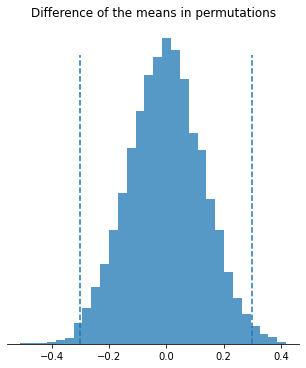

In [ ]:
sns.displot(dif_means, bins=30, linewidth=0);
plt.axvline(-0.3, linestyle="--", ymax=0.9);
plt.axvline(0.3, linestyle="--", ymax=0.9);
plt.title("Difference of the means in permutations");
plt.ylabel("");
sns.despine(left=True);
plt.yticks([], []);

The distribution is normal: the Central Limit Theorem also applies here!

## 3. Using scipy:

Scipy has an adaptation of the t-test called the "Welch's t-test", which is more reliable for samples with different variances and/or sample sizes: https://en.wikipedia.org/wiki/Welch%27s_t-test

That's why we will get slightly different statistic and p-values.

In [ ]:
stats.ttest_ind(f_a, 
                f_b,
                equal_var=True)

Ttest_indResult(statistic=-2.4358329090845103, pvalue=0.0189763029680601)

## 4. Exercise: 

You have created an an experiment with two variants of a webpage. The metric you are comparing is the session time each user stays in the page. 

If your significance level is 90%, is there a statistically significance difference between the two pages?

In [ ]:
import pandas as pd

# session_times.csv
url = 'https://drive.google.com/file/d/1nYRMCgv3OKaiIUDBPgq-EnE2sWhgrJI3/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
session_times = pd.read_csv(path)

session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


In [ ]:
session_times.Page.value_counts()

Page A    21
Page B    15
Name: Page, dtype: int64

### Exercise solution

Follow these steps

1. Find the observed difference between the mean session time fo the two pages.

2. Establish the Null and the Alternative Hypotheses.

3. Define your alpha.

4. Filter the dataframe `session_times` so that you can have two Pandas Series with the session times for Paga A and Page B.

5. Use Scipy to find the p-value.

6. State the result of the experiment and the interpretation of the p-value.

In [ ]:
# your solution here

#### 1. Find the observed difference between the mean session time fo the two pages.

In [ ]:
time_by_session = session_times.groupby("Page")["Time"].mean()
time_by_session

Page
Page A    126.333333
Page B    162.000000
Name: Time, dtype: float64

In [ ]:
observed_difference = time_by_session[0] - time_by_session[1]
abs(observed_difference)

35.66666666666667

#### 2. Establish the Null and the Alternative Hypotheses.

- Null Hypothesis: difference between session times of Page A and Page B = 0

- Alternative Hypothesis: difference between session times of Page A and Page B != 0

#### 3. Define and interpret your alpha.

Our significance level was set to 90%.

- Alpha = 1 - significance level = 1 - 0.9 = `0.1`

If our p-value is lower than `0.1` we will reject the Null Hypothesis. If our p-value is higher than `0.1` we will fail to reject it.

#### 4. Filter the dataframe `session_times` so that you can have two Pandas Series with the session times for Paga A and Page B.

In [ ]:
page_A = session_times.loc[session_times.Page=="Page A", 
                           "Time"]
page_B = session_times.loc[session_times.Page=="Page B", 
                           "Time"]

#### 5. Use Scipy to find the p-value.

In [ ]:
t_statistic, p_value = stats.ttest_ind(page_A, 
                                       page_B)
print("p-value:", p_value)

p-value: 0.2690102436392606


#### 6. State the result of the experiment and the interpretation of the p-value.

**Experiment data:**

* null hypothesis: `d = 0`
* observed difference `d = 35.7`
* alpha = `0.1`
* p-value = `0.27`

Since p-value > alpha, **we fail to reject the Null Hypothesis.**

**Interpretation of the p-value**: 
* the probability of collecting data with a difference equal or larger than our observed difference (`35.7`), under the assumption that the null hypothesis is true (`d = 0`) is `27%`. 
* This is a large probability, way larger than the threshold that we set to ourselves (`0.1`), and therefore we consider that the null hypothesis is plausible: we do not reject the hypothesis that the observed difference in session times between pages A and B is due to chance.